In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('/content/water_potability.csv')

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**Finding Null Values**

In [ ]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


**Deleting Null values from dataset**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


**Checking for duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

**Checking for Outliers**

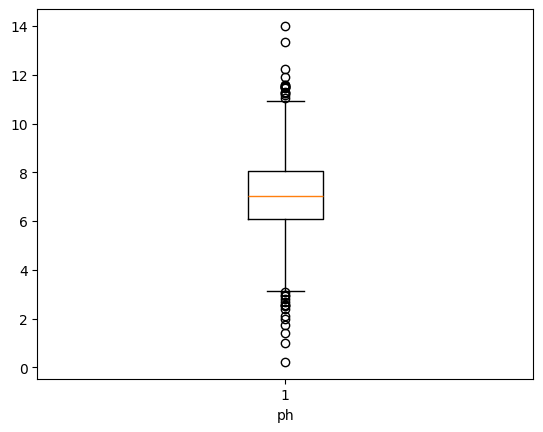

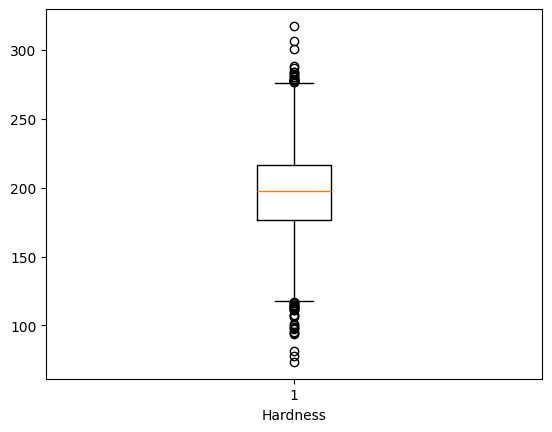

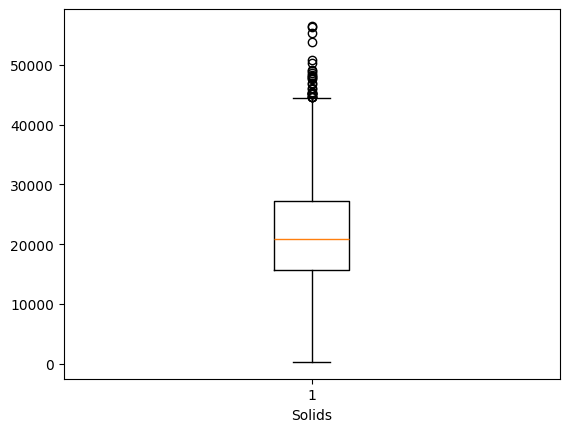

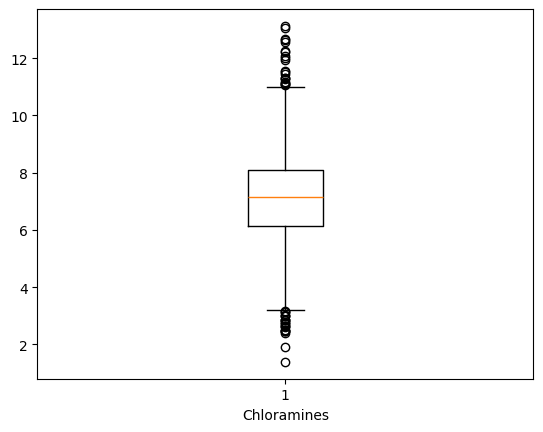

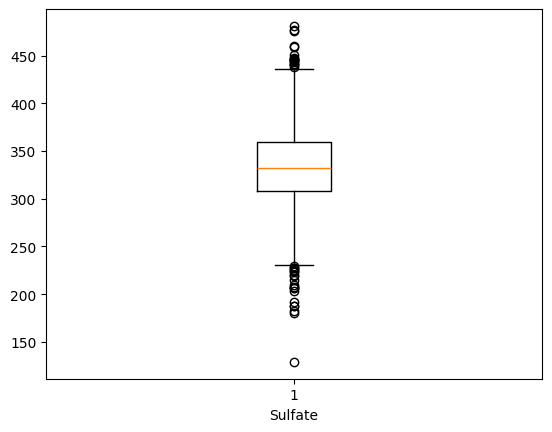

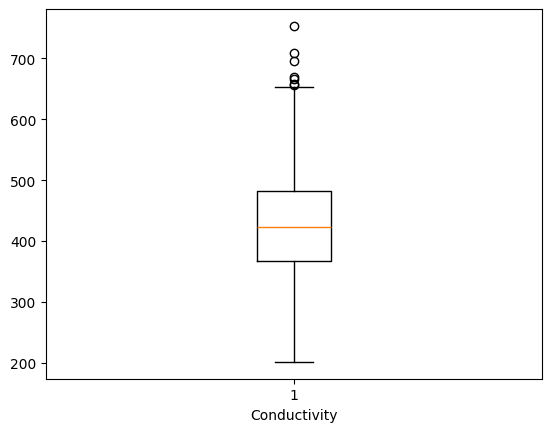

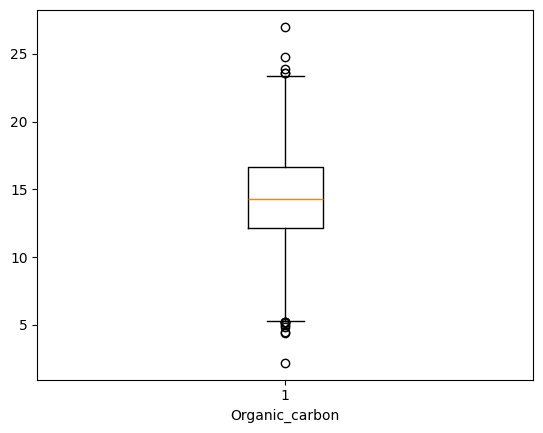

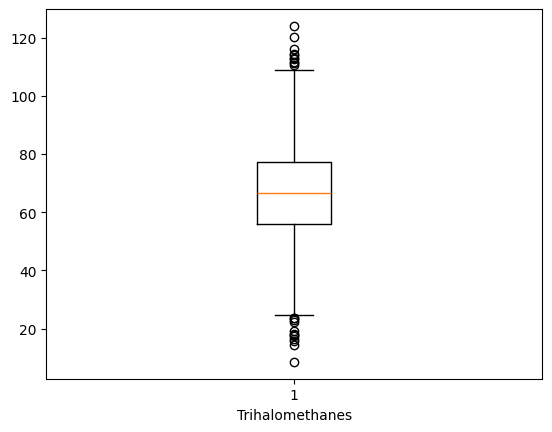

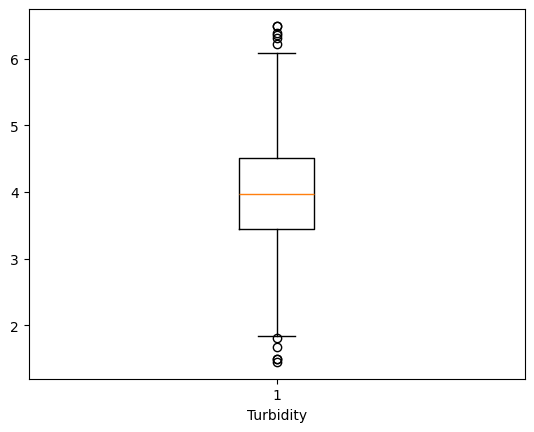

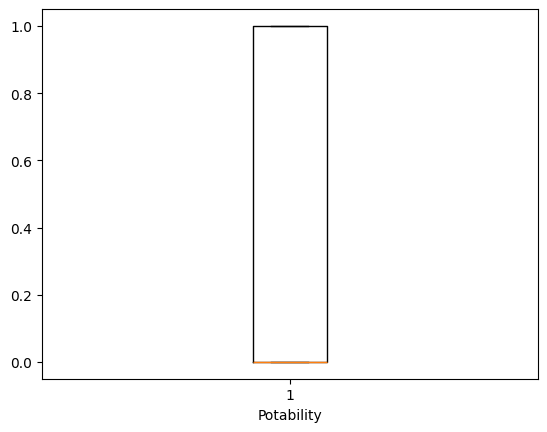

In [ ]:
N=df.columns
for i in N:
 if df[i].dtype=='object':
  continue
 plt.boxplot(df[i])
 plt.xlabel(i)
 plt.show()


In [ ]:
columns=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
for i in columns:
  if df[i].dtype=='object':
    continue
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  low_fence=q1-1.5*(iqr)
  high_fence=q3+1.5*(iqr)
  df=df[(df[i]>=low_fence) & (df[i]<=high_fence)]

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702,1
3265,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1


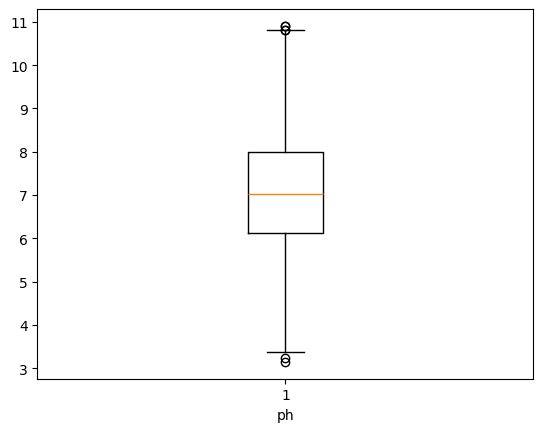

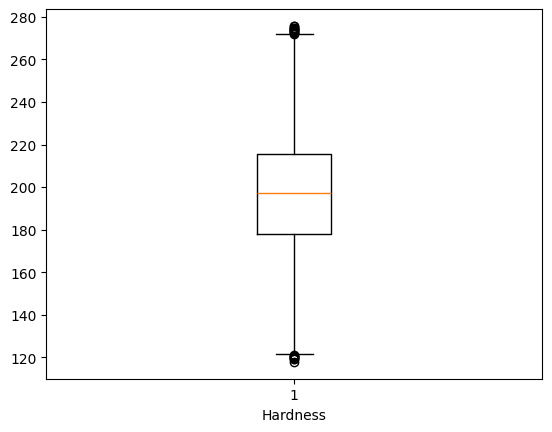

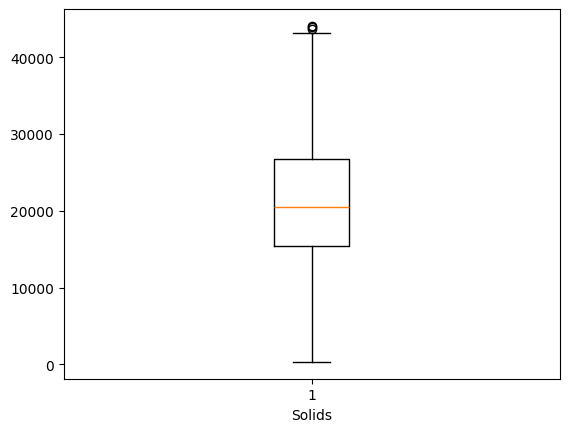

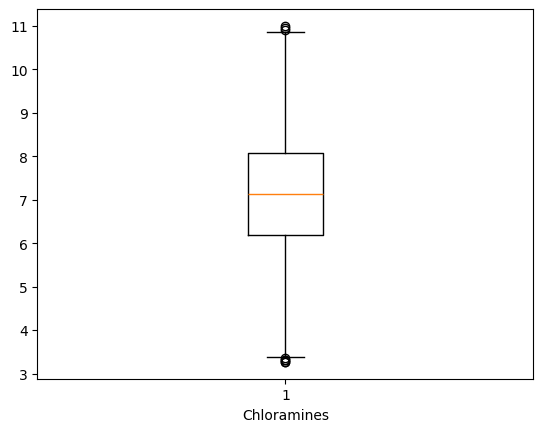

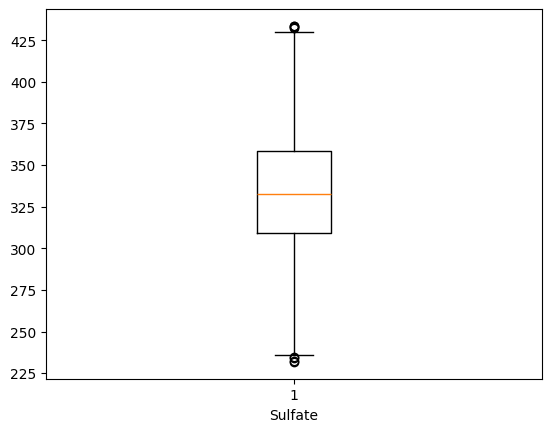

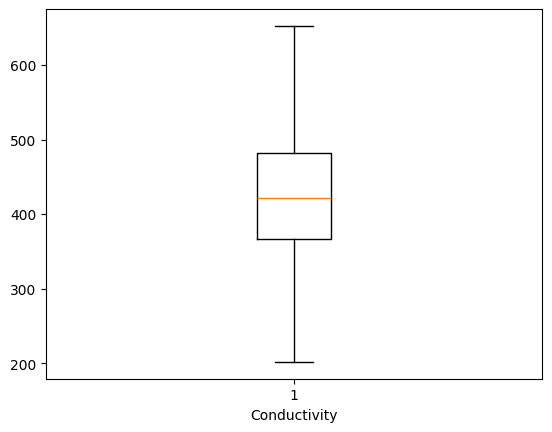

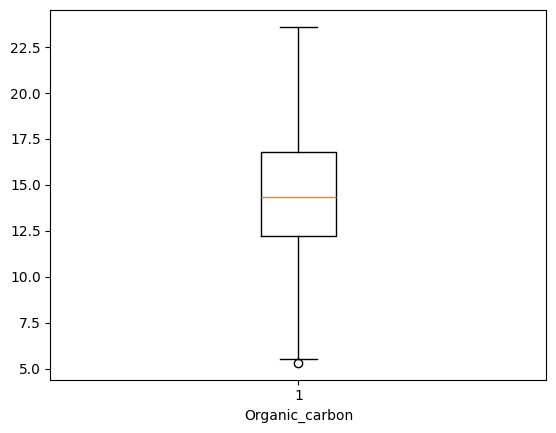

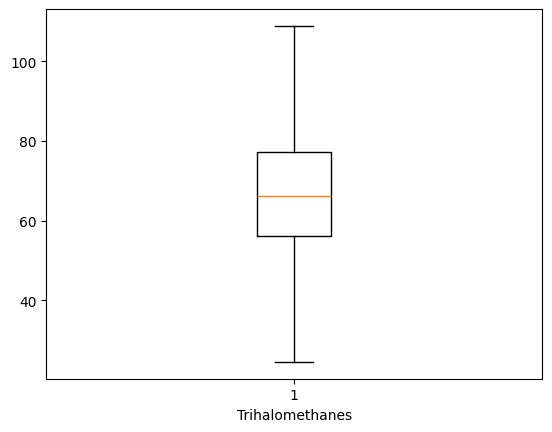

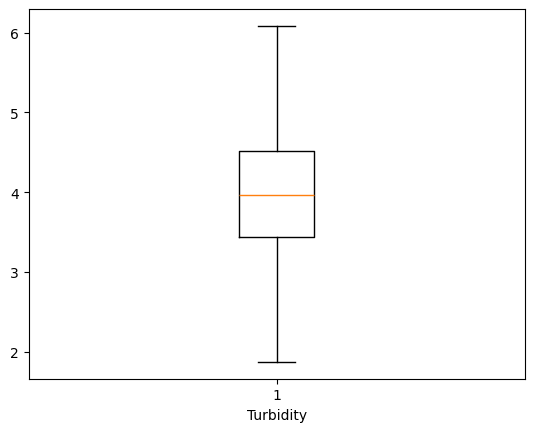

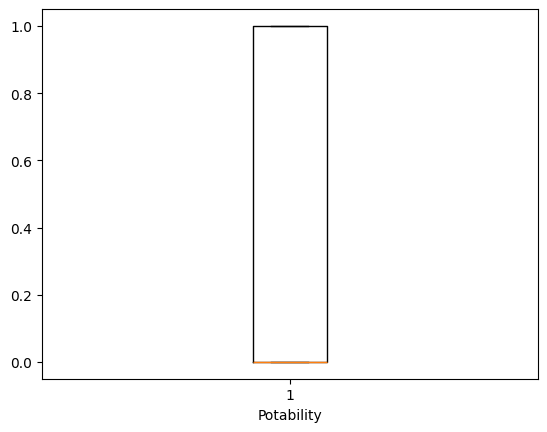

In [ ]:
N=df.columns
for i in N:
 if df[i].dtype=='object':
  continue
 plt.boxplot(df[i])
 plt.xlabel(i)
 plt.show()


In [ ]:
X=df.drop('Potability',axis=1)
y=df['Potability']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [ ]:
se=StandardScaler()
x_train_scaled=se.fit_transform(x_train)
x_test_scaled=se.transform(x_test)

In [ ]:
model=LogisticRegression()


In [ ]:
model.fit(x_train_scaled,y_train)


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test_scaled)
accuracy_score(y_test,y_pred)*100

61.1731843575419

In [ ]:
model=RandomForestClassifier(n_estimators=200,random_state=45)
model.fit(x_train_scaled,y_train)


RandomForestClassifier(n_estimators=200, random_state=45)

In [ ]:
y_pred=model.predict(x_test_scaled)
accuracy_score(y_test,y_pred)*100

67.0391061452514

In [ ]:
base_model=RandomForestClassifier(random_state=42)
param_grid={
    'n_estimators':[100,200,300],
     'min_samples_leaf':[1,2,4],
     'min_samples_split':[2,5,7],
     'max_depth':[3,4,5],
     'criterion':['gini','entropy']
    }

In [ ]:
grid_search=GridSearchCV(estimator=base_model,param_grid=param_grid)

In [ ]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [25]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [30]:
model=RandomForestClassifier(criterion='gini',max_depth=5,min_samples_leaf=1,min_samples_split=5,n_estimators=300,random_state=45)

In [31]:
model.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=300,
                       random_state=45)

In [32]:
y_pred=model.predict(x_test_scaled)
accuracy_score(y_test,y_pred)*100

64.24581005586593

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.95      0.76       219
           1       0.67      0.16      0.26       139

    accuracy                           0.64       358
   macro avg       0.65      0.55      0.51       358
weighted avg       0.65      0.64      0.57       358



In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train_scaled, y_train)

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=300,
    random_state=45
)
model.fit(x_train_res, y_train_res)

RandomForestClassifier(n_estimators=300, random_state=45)

In [38]:
y_pred=model.predict(x_test_scaled)
accuracy_score(y_test,y_pred)

0.6564245810055865

In [39]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73       219
           1       0.56      0.52      0.54       139

    accuracy                           0.66       358
   macro avg       0.64      0.63      0.63       358
weighted avg       0.65      0.66      0.65       358

Confusion Matrix:
 [[163  56]
 [ 67  72]]
ROC-AUC Score: 0.6311389244768568
